## **Twitter Sentiment Analysis**

This project is divided into below modules:



1.  **Text Preprocessing**
2.  **Data Exploration**
3.  **Feature Extraction**
4.  **Model Building**



**Loading the libraries:**

In [32]:
import re  # regular expression
import nltk # Natural language toolkit for text manipulation
import string       
import warnings  # to warn developers
import numpy as np # to perform mathematical operations (numerical data)
import pandas as pd # for data wrangling and daat analysis (tabular data)
import seaborn as sns # for statistical graphs
import matplotlib.pyplot as plt # to make matplotlib work like MATLAB

In [33]:
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [34]:
train=pd.read_csv('/content/drive/MyDrive/FDA/PROJECT/Datasets/train_E6oV3lV.csv')
test=pd.read_csv('/content/drive/MyDrive/FDA/PROJECT/Datasets/test_tweets_anuFYb8.csv')

# **1. TEXT PREPROCESSING**



1. **DATA INSPECTION**



In [35]:
train[train['label']==0].head(10)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [36]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [37]:
train.shape,test.shape # to get the dimentions

((31962, 3), (17197, 2))

In [38]:
train["label"].value_counts() # for label descripton

0    29720
1     2242
Name: label, dtype: int64

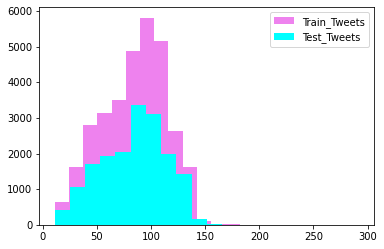

In [39]:
length_train=train['tweet'].str.len()
length_test=test['tweet'].str.len()
plt.hist(length_train,bins=20,label="Train_Tweets",color="violet")
plt.hist(length_test,bins=20,label="Test_Tweets",color="cyan")
plt.legend()
plt.show()

2. **DATA CLEANING**

In [40]:
comb=train.append(test,ignore_index=True)
comb.shape


(49159, 3)

In [41]:
def remove_pattern(input_text,pattern):
  r=re.findall(pattern,input_text)
  for i in r:
    input_text=re.sub(i,'',input_text)
  return input_text

In [42]:
comb['tidy_tweet']=np.vectorize(remove_pattern)(comb['tweet'],"@[\w]*") # Removing @user
comb['tidy_tweet']=comb['tidy_tweet'].str.replace("[^a-zA-Z#]"," ") # Removing puntutations
comb['tidy_tweet']=comb['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

#tokenizing 
tokenized_tweet=comb['tidy_tweet'].apply(lambda x: x.split()) 
tokenized_tweet.head()

# Normaliing the tweets
from nltk.stem.porter import *
stemmer=PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

#Detokenizer
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i]=' '.join(tokenized_tweet[i])
comb['tidy_tweet']=tokenized_tweet
comb.head(10)


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fare talk befor they leav chao disput when they there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camp tomorrow danni
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,love land #allin #cav #champion #cleveland #clevelandcavali
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcom here


# **2. EXPLORING AND VISUALIZING DATA**


* **WORDCLOUD for Complete Dataset**

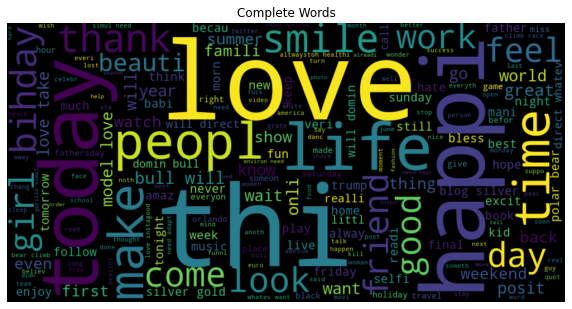

In [43]:
all_words=''.join([text for text in comb['tidy_tweet']])
from wordcloud import WordCloud 
wordcloud = WordCloud(width=1000,height=500,random_state=21,max_font_size=200).generate(all_words) 
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.title('Complete Words')
plt.show()

* **WORDCLOUD for Non-Racist Words**

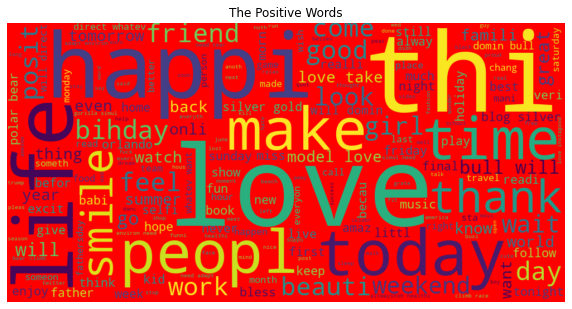

In [44]:
non_racist_words=''.join([text for text in comb['tidy_tweet'][comb['label']== 0]])
wordcloud = WordCloud(background_color = 'red',width=1000,height=500,random_state=21,max_font_size=200).generate(non_racist_words) 
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

* **WORDCLOUD for Racist Words**

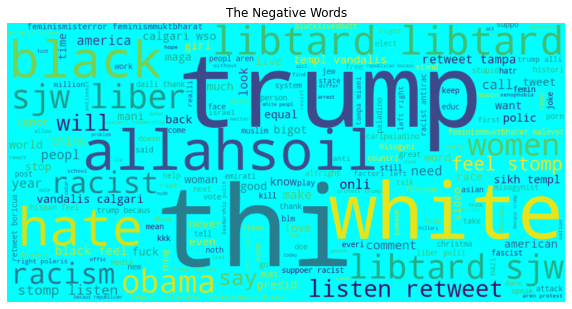

In [45]:
racist_words=''.join([text for text in comb['tidy_tweet'][comb['label']== 1]])
wordcloud = WordCloud(background_color = 'cyan',width=1000,height=500,random_state=21,max_font_size=200).generate(racist_words) 
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

* **Extracting Hashtags**

In [46]:
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

HT_non_racist=hashtag_extract(comb['tidy_tweet'][comb['label']==0])
HT_racist=hashtag_extract(comb['tidy_tweet'][comb['label']==1])
HT_non_racist=sum(HT_non_racist,[ ])
HT_racist=sum(HT_racist,[ ])



* **Top 20 most frequent non-racist hashtags**

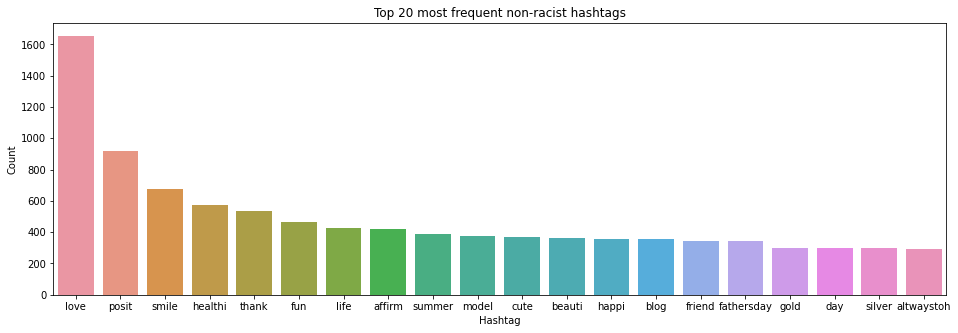

In [47]:
a = nltk.FreqDist(HT_non_racist)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent non-racist hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
ax.set(title="Top 20 most frequent non-racist hashtags")
plt.show()



* **Top 20 most frequent racist hashtags**

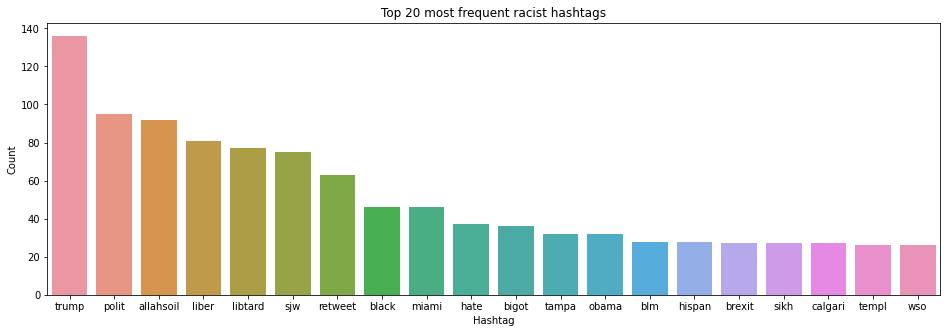

In [48]:
a = nltk.FreqDist(HT_racist)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent racist hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
ax.set(title="Top 20 most frequent racist hashtags")
plt.show()


# **3. EXTRACTING FEATURES FROM CLEANED TWEETS** 

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer 
import gensim

* **BAG-OF-WORDS FEATURES**

In [50]:
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(comb['tidy_tweet'])
bow.shape

(49159, 1000)

* **TF-IDF FEATURES**

In [51]:

tfidf_vectorizer=TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(comb['tidy_tweet'])
tfidf.shape

(49159, 1000)

# **4. MODEL BUILDING** 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  
from sklearn.metrics import f1_score

* **LOGISTIC REGRESSION + Bag-Of-Word**

In [52]:
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]
xtrain_bow,xvalid_bow,ytrain,yvalid=train_test_split(train_bow,train['label'],random_state=42,test_size=0.3)

In [53]:
lreg=LogisticRegression()
lreg.fit(xtrain_bow, ytrain)
prediction = lreg.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.5303408146300915

* **LOGISTIC REGRESSION + TF-IDF**

In [54]:

train_tfidf = tfidf[:31962,:] 
test_tfidf = tfidf[31962:,:] 
xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]
lreg.fit(xtrain_tfidf, ytrain) 
prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) 


0.5451327433628319

In [55]:
# Predicted Result of Test File
test_pred = lreg.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
# writing data to a CSV file
submission.to_csv('Bag_of_words_LR.csv', index=False) 

* **RANDOM FOREST + Bag-Of-Words**

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow) 
# validation score 
f1_score(yvalid, prediction)

0.5529225908372828

In [59]:

test_pred = rf.predict(test_bow) 
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('Bag_of_words_RF.csv', index=False)

* **RANDOM FOREST + TF-IDF**

In [57]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain) 
prediction = rf.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.562152133580705